<a href="https://colab.research.google.com/github/ramrakhyaniRiya/Netflix_TVshows-Movies/blob/main/Netflix_TV_Shows_and_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Netflix - TV Shows and Movies

Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies without commercials on an internet-connected device. You can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection.

# **TASKS**

Developing a content-based recommender system using the genres and/or descriptions.

Identifying the main content available on the streaming.

Network analysis on the cast of the titles.

Exploratory data analysis to find interesting insights.

# **IMPORTING LIBRARIES **

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# **IMPORTING DATASET **

In [5]:
df = pd.read_csv("/content/titles.csv")

# ***Description of the dataset***

ID: The title ID on JustWatch.

title: The name of the title.

show type: TV show or movie.

description: A brief description.

release year: The release year.

age certification: The age certification.

runtime: The length of the episode (SHOW) or movie.

genres: A list of genres.

production countries: A list of countries that produced the title.

seasons: Number of seasons if it's a SHOW.

IMDB ID: The title ID on IMDB.

IMDB Score: Score on IMDB.

IMDB Votes: Votes on IMDB.

TMDB Popularity: Popularity on TMDB.

TMDB Score: Score on TMDB.

# *BASIC OPERATIONS*

In [6]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [7]:
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [9]:
df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [10]:
df.shape

(5806, 15)

In [11]:
df.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

In [12]:
df['description'].unique()

array(['This collection includes 12 World War II-era propaganda films — many of which are graphic and offensive — discussed in the docuseries "Five Came Back."',
       'A mentally unstable Vietnam War veteran works as a night-time taxi driver in New York City where the perceived decadence and sleaze feed his urge for violent action, attempting to save a preadolescent prostitute in the process.',
       'King Arthur, accompanied by his squire, recruits his Knights of the Round Table, including Sir Bedevere the Wise, Sir Lancelot the Brave, Sir Robin the Not-Quite-So-Brave-As-Sir-Lancelot and Sir Galahad the Pure. On the way, Arthur battles the Black Knight who, despite having had all his limbs chopped off, insists he can still fight. They reach Camelot, but Arthur decides not  to enter, as "it is a silly place".',
       ...,
       'A man from Nigeria returns to his family in Canada and discovers that Western culture has changed his children in ways that he does not approve.',
       

In [13]:
df['description'].value_counts()

Five families struggle with the ups and downs of cancer treatment over the course of six years.                                                                                                                                                                                                                                                                                                                                                 2
Away from school, during the winter holidays, three new stories take place while the Las Encinas students celebrate Christmas.                                                                                                                                                                                                                                                                                                                  2
Marta may be an orphan, and she may be affected by a lethal illness, yet she is the most positive person one can meet. She wants a b

# **Remove Columns that are not necessary**

In [14]:
df.drop(['description','imdb_id','imdb_score','imdb_votes'],axis=1,inplace=True)

In [15]:
df.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,95.337,7.7


In [16]:
df.isnull().sum()

id                         0
title                      1
type                       0
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
tmdb_popularity           94
tmdb_score               318
dtype: int64

Remove Null Records

In [17]:
df.dropna(axis=0,how = 'any', inplace = True)

In [18]:
df.isnull().sum()

id                      0
title                   0
type                    0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
tmdb_popularity         0
tmdb_score              0
dtype: int64

In [19]:
df.shape

(1683, 11)

LOADING THE DATASET

In [20]:
crd = pd.read_csv('/content/credits.csv')

# ***Description of the data***

person ID: The person ID on JustWatch.

ID: The title ID on JustWatch.

name: The actor or director's name.

character name: The character name.

role: ACTOR or DIRECTOR.

In [21]:
crd.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [22]:
crd.shape

(77213, 5)

In [23]:
crd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77213 entries, 0 to 77212
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77213 non-null  int64 
 1   id         77213 non-null  object
 2   name       77213 non-null  object
 3   character  67586 non-null  object
 4   role       77213 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.9+ MB


In [24]:
crd.describe()

,person_id
count,7.721300e+04
mean,4.994603e+05
std,6.128431e+05
min,7.000000e+00
25%,4.158400e+04
50%,1.829850e+05
75%,8.415570e+05
max,2.371585e+06


In [25]:
crd.isnull().sum()

person_id       0
id              0
name            0
character    9627
role            0
dtype: int64

**Remove Columns that are not necessary**

In [26]:
crd.drop(['person_id','character'],axis=1,inplace=True)

In [27]:
crd.tail()

,id,name,role
77208,tm1098060,Nnenna Rachael Okonkwo,ACTOR
77209,tm1098060,Lucien Morgan,ACTOR
77210,tm1098060,Magdalena Korpas,ACTOR
77211,tm1098060,Mistura Olusanya,ACTOR
77212,tm1098060,Yemi Amodu,DIRECTOR


# ***Let's do some Exploratory Data Analysis***

In [28]:
df.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [29]:
crd.columns

Index(['id', 'name', 'role'], dtype='object')

In [30]:
df['release_year'].value_counts()

2018    251
2021    250
2020    246
2019    245
2017    152
2016    118
2022     89
2015     81
2014     39
2013     33
2011     27
2012     27
2009     16
2010     14
2006     12
2008     10
2005      8
2003      8
2007      7
2001      5
2000      5
1998      5
2004      4
1993      4
1999      3
1989      3
2002      3
1994      3
1991      2
1995      2
1997      2
1983      1
1982      1
1984      1
1972      1
1987      1
1981      1
1996      1
1992      1
1969      1
Name: release_year, dtype: int64

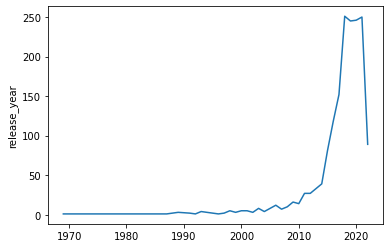

In [31]:
release_year = df['release_year'].value_counts()
sns.lineplot(data=release_year)
plt.show()

We can deduce that after 2010, TV series and movies were available.

In [32]:
certificate = df['age_certification'].value_counts()
certificate.head()

TV-MA    814
TV-14    433
TV-PG    167
TV-Y7    103
TV-Y      92
Name: age_certification, dtype: int64

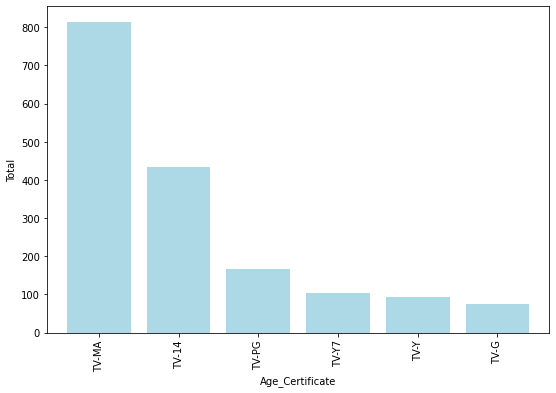

In [33]:
certificate.plot(kind = 'bar', width =0.8, figsize=(9, 6),color='lightblue')
plt.xlabel('Age_Certificate')
plt.ylabel('Total')
plt.show()

In [34]:
df['genres'].nunique()

709

In [35]:
df['production_countries'].nunique()

95

In [36]:
df['production_countries'].value_counts()

['US']                687
['JP']                143
['KR']                114
['GB']                108
['ES']                 54
                     ... 
['NG']                  1
['AE']                  1
['KR', 'US']            1
['AE', 'SA', 'SY']      1
['FR', 'IT']            1
Name: production_countries, Length: 95, dtype: int64

In [37]:
countries=df['production_countries'].value_counts().head(15)
countries

['US']    687
['JP']    143
['KR']    114
['GB']    108
['ES']     54
['FR']     45
['CA']     41
['MX']     39
['CN']     39
['IN']     29
['TW']     28
[]         28
['BR']     27
['AU']     23
['CO']     20
Name: production_countries, dtype: int64

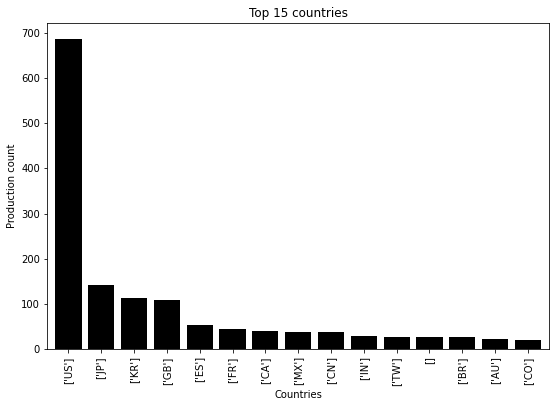

In [38]:
countries.plot(kind = 'bar', width =0.8, figsize=(9, 6),color='black')
plt.title('Top 15 countries')
plt.xlabel('Countries')
plt.ylabel('Production count')
plt.show()

In [39]:
# MERGEING OF TWO DATA SETS & REVIEW FIRST 5 ROWS OF DATAFRAME
data_titles_credits = pd.merge(df,crd)
data_titles_credits.head(5)

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,tmdb_popularity,tmdb_score,name,role
0,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Graham Chapman,ACTOR
1,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Michael Palin,ACTOR
2,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Terry Jones,ACTOR
3,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Eric Idle,ACTOR
4,ts22164,Monty Python's Flying Circus,SHOW,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,12.919,8.3,Terry Gilliam,ACTOR


In [41]:
data_titles_credits['role'].unique()

array(['ACTOR', 'DIRECTOR'], dtype=object)

In [42]:
data_titles_credits['role'].value_counts()

ACTOR       11598
DIRECTOR      501
Name: role, dtype: int64

<Figure size 1440x504 with 0 Axes>

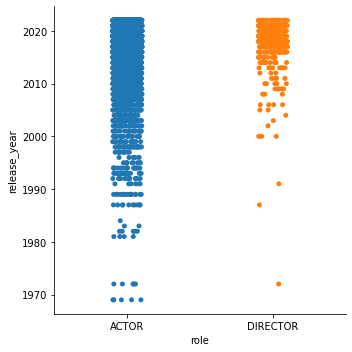

In [43]:
plt.figure(figsize = (20,7))
sns.catplot(x = 'role', y = 'release_year', data = data_titles_credits)

In [44]:
data_titles_credits.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'tmdb_popularity',
       'tmdb_score', 'name', 'role'],
      dtype='object')

In [45]:
data_titles_credits['seasons'].unique()

array([ 4.,  1.,  9., 24.,  5., 39., 13., 10., 42., 21.,  7., 37.,  8.,
       29., 14.,  6., 11.,  2., 18., 12., 15., 19.,  3.])

In [46]:
data_titles_credits['seasons'].value_counts()

1.0     6875
2.0     2247
3.0     1077
4.0      739
5.0      447
6.0      284
7.0      100
8.0       90
9.0       54
11.0      43
10.0      25
15.0      21
14.0      18
13.0      14
18.0      13
21.0      11
12.0      11
29.0      10
24.0       9
19.0       7
39.0       2
42.0       1
37.0       1
Name: seasons, dtype: int64

In [47]:
data_titles_credits['type'].unique()

array(['SHOW'], dtype=object)

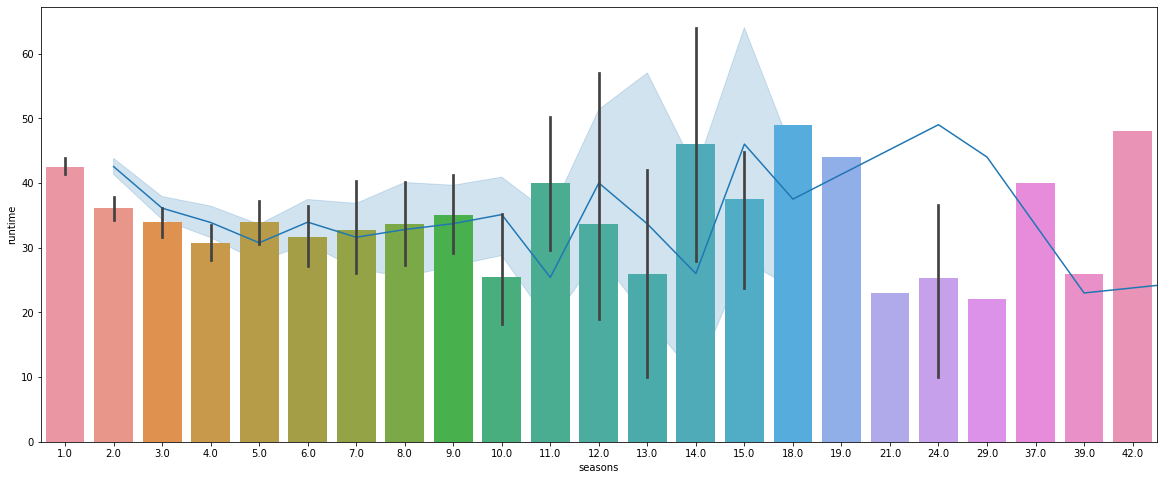

In [48]:
plt.figure(figsize = (20,8))
sns.lineplot( x = df['seasons'], y = df['runtime'])
sns.barplot(x = df['seasons'], y = df['runtime'])

In [49]:
data_titles_credits['runtime'].unique()

array([ 30,  43,  24,  51,  10,  23,  26,  15,  48,  44,  22,  25,  47,
        40,  46,  28,  21,  19,   9,  49,  58,  57,  45,  42,  52,  29,
        27,  64, 141,  11,   6,  55,  35,  18,  61,  14,  17,  20,  72,
         3,  67,  56,  59, 225,  37,  53,  54,  41,   2,   5,  60,  90,
        13,  73,  63,  62,  32,  50,  92,   7, 122,  71,  95,  97,  65,
        31,  69,  70,  16,  36,  84,  87,  39,  34,  33,  86,  76,  79,
        68,  75,  80,  66,  38, 108,  78,  12,  83,  89,  85,  88,  74,
         8, 199,  82,  96, 178,   0,  93, 131,  81])

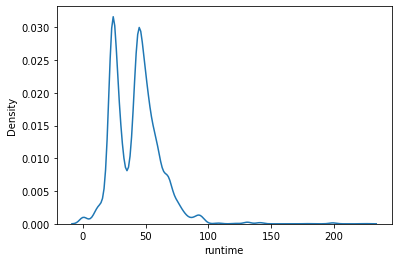

In [67]:
ax=sns.kdeplot(data=data_titles_credits['runtime'])

In [58]:
data_titles_credits['tmdb_popularity'].unique()

array([ 12.919,   1.49 , 128.743, ...,   6.925,   1.834,   0.959])

In [57]:
data_titles_credits['tmdb_score'].unique()

array([ 8.3,  7. ,  7.5,  6.6,  8. ,  6.7,  6.3,  7.3,  7.4,  8.2,  7.6,
        8.8,  8.5,  7.9,  7.8,  8.6,  6.2,  5. ,  8.7,  7.7,  8.1,  8.4,
        5.3,  7.2,  6.5,  7.1,  6.9,  5.6,  8.9,  9. ,  2.3,  9.2,  6.8,
        1. ,  6. ,  5.9,  6.1,  5.5,  5.7,  9.1,  4.9,  6.4,  5.8,  5.4,
        5.1, 10. ,  4. ,  9.7,  3.6,  5.2,  2.8,  9.3,  9.4,  4.6,  4.8,
        2.7,  9.8,  3.5,  9.5,  9.6,  3. ,  2. ,  4.3])

In [73]:
data_titles_credits.columns

Index(['id', 'title', 'type', 'release_year', 'age_certification', 'runtime',
       'genres', 'production_countries', 'seasons', 'tmdb_popularity',
       'tmdb_score', 'name', 'role'],
      dtype='object')